<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/Clusterin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

blob_centers = np.array(
    [[-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3],
     [-1.5 , 2.3],
     [ 0.2,  2.3]])

blob_std = np.array(
    [0.1,
     0.1,
     0.1,
     0.3,
     0.5]
)

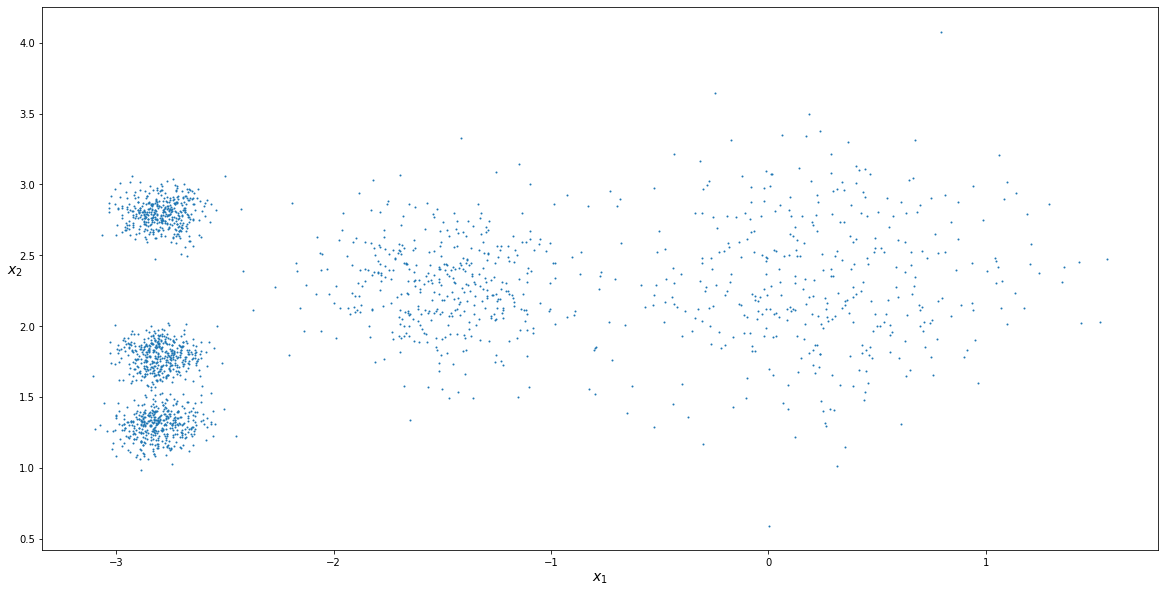

In [4]:
blob_std = np.array([0.1, 0.1, 0.1, 0.3, 0.5])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

plt.figure(figsize=(20, 10))
plot_clusters(X)
plt.show()

In [5]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

y_pred # this return the index of the cluster data instances are assigned too

array([4, 2, 2, ..., 3, 2, 2], dtype=int32)

In [6]:
kmeans.labels_

array([4, 2, 2, ..., 3, 2, 2], dtype=int32)

In [7]:
kmeans.cluster_centers_

array([[-2.7890438 ,  2.79346898],
       [ 0.0923515 ,  1.96595598],
       [-2.80222983,  1.54559054],
       [-1.46641646,  2.29504288],
       [ 0.43282319,  2.69260766]])

In [8]:
X[0]

array([0.70880293, 2.527351  ])

In [9]:
print(np.unique(y_pred))
print(len(y_pred))

[0 1 2 3 4]
2000


[0.70880293 2.527351  ]


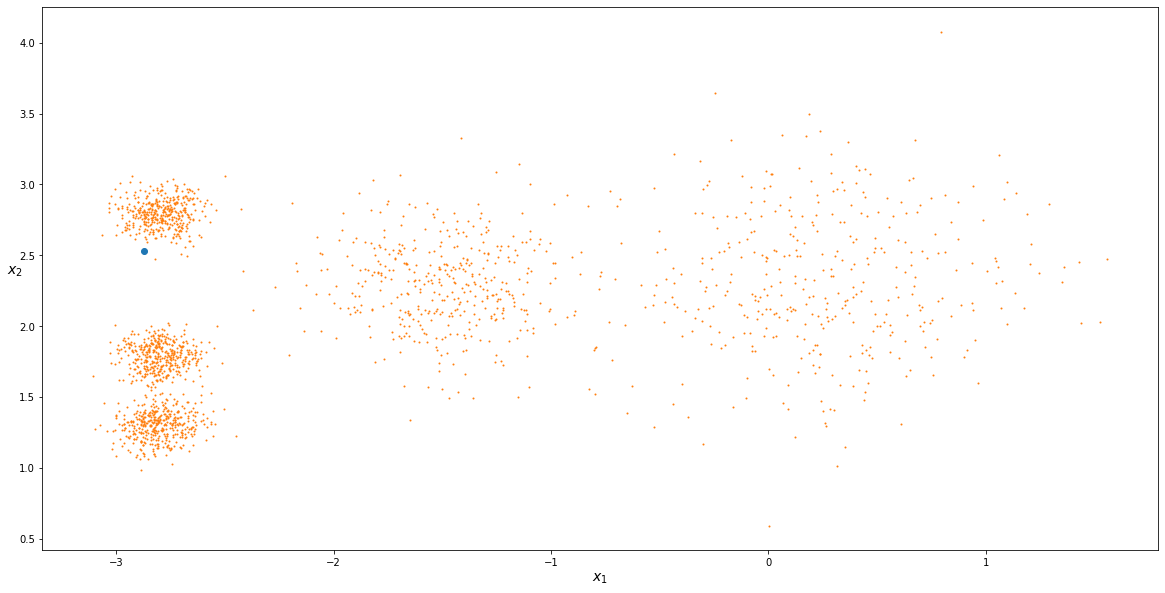

In [14]:
print(X[0])
plt.figure(figsize=(20, 10))
plt.scatter(X[1, 0], X[0, 1])
plot_clusters(X)
plt.show()

In [15]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 4, 0, 0], dtype=int32)

In [22]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=3)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=50, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=35, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=18)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

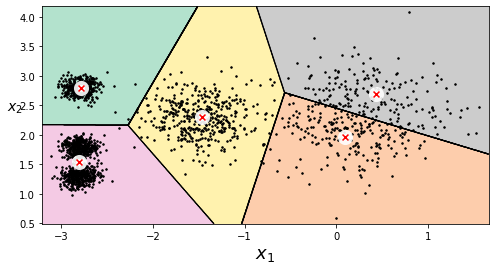

In [23]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [25]:
[[-2.7890438 ,  2.79346898],
       [ 0.0923515 ,  1.96595598],
       [-2.80222983,  1.54559054],
       [-1.46641646,  2.29504288],
       [ 0.43282319,  2.69260766]]

blob_centers = np.array(
    [[-2.8,  1.3],
     [-1.5 , 2.3],
     [ 0.2,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8]])

blob_std = np.array([0.3, 0.5, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

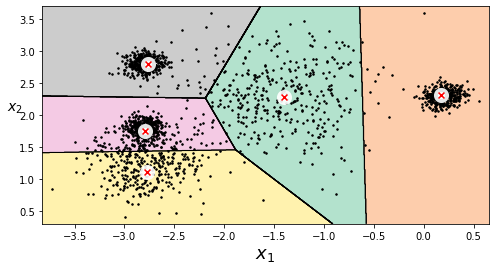

In [26]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Hard vs Soft Clustering

In [29]:
# X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])  # 5 centroids = 20 items to return, shape (4, 5)
kmeans.transform(X_new)

array([[1.42497421, 0.35007867, 2.80045981, 2.91206613, 2.88112183],
       [4.40690714, 2.84433087, 5.79477578, 5.84198996, 5.82298811],
       [1.75847618, 3.24732694, 1.26543192, 1.89698323, 0.30628102],
       [1.6174843 , 3.17805163, 0.77686613, 1.40177691, 0.37969958]])

In [35]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

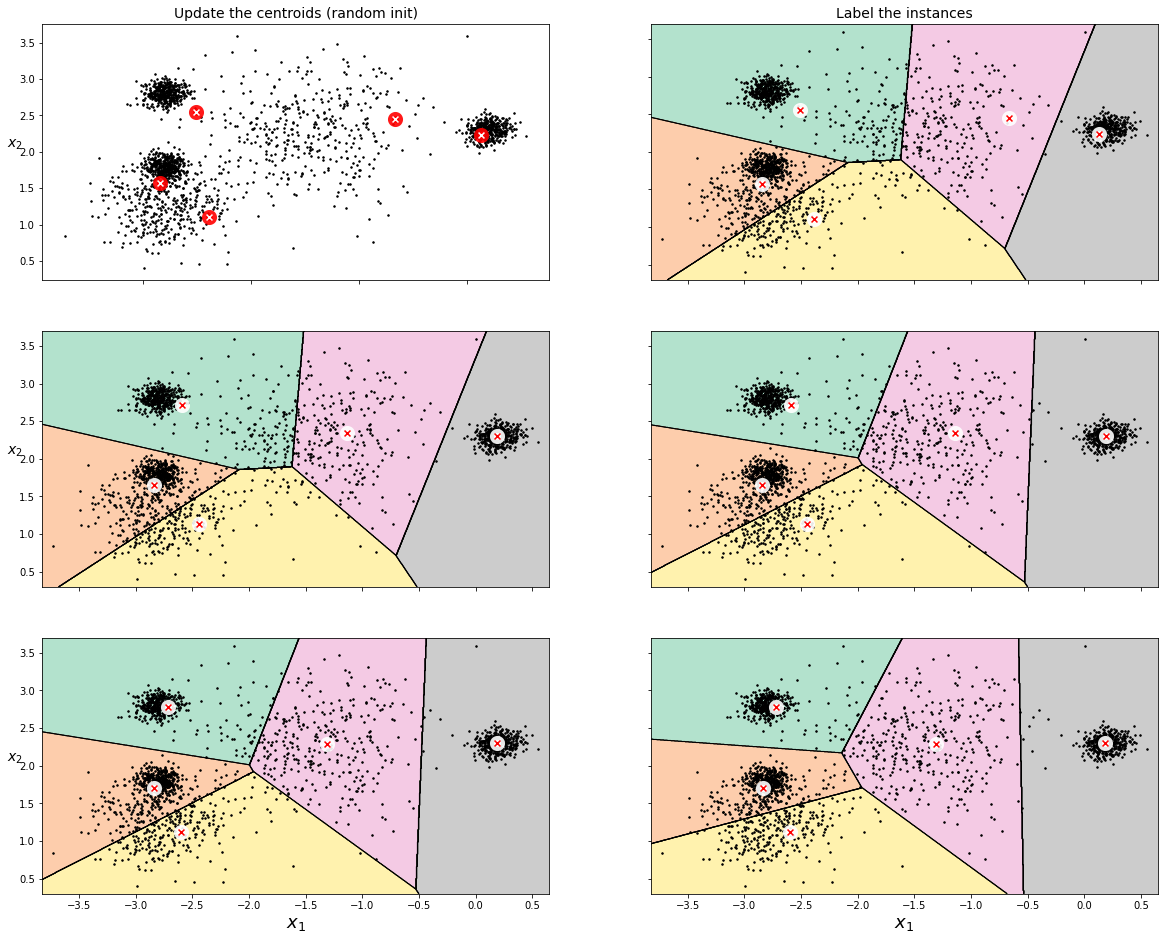

In [36]:
plt.figure(figsize=(20, 16))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (random init)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [53]:
print(kmeans_iter1.inertia_)
print(kmeans_iter2.inertia_)
print(kmeans_iter3.inertia_)

397.2453704244732
273.03607343107456
233.65471981068663


In [54]:
kmeans_iter3.score(X)

-233.6547198106866

In [65]:
kmeans = KMeans(n_clusters=5, init=np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]]) , n_init=1)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [66]:
print(kmeans.inertia_)

225.71037529959392


### Choosing K

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
silhouette_score(X, kmeans.labels_)

0.6212226068487176

In [67]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

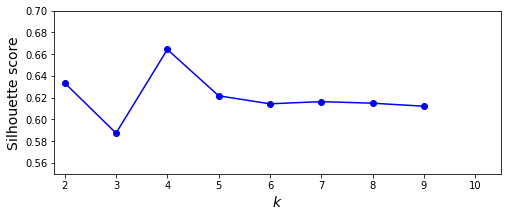

In [68]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.5, 0.55, 0.7])
plt.show()

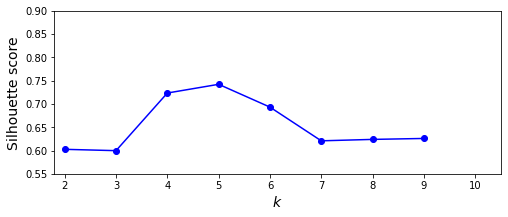

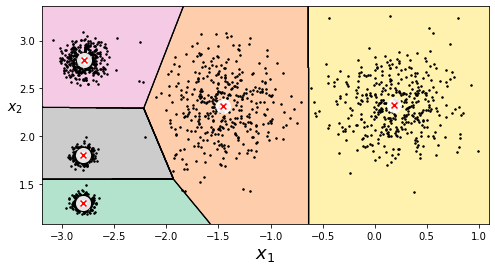

In [70]:
    
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
blob_centers = np.array(
    [[-2.8,  1.3],
     [-1.5 , 2.3],
     [ 0.2,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8]])
blob_std = np.array(
    [0.05,
0.3,
0.3,
0.05,
0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=42)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.5, 0.55, 0.9])
plt.show()
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()
